In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tracks_df = pd.read_csv("spotify_tracks.csv")

In [ ]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
tracks_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

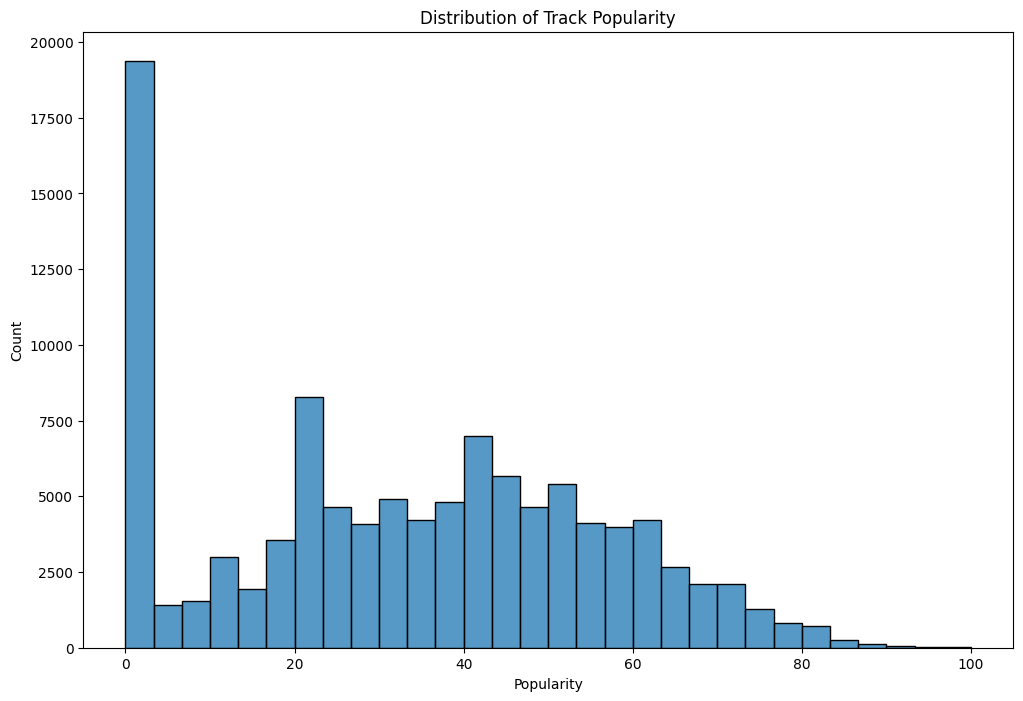

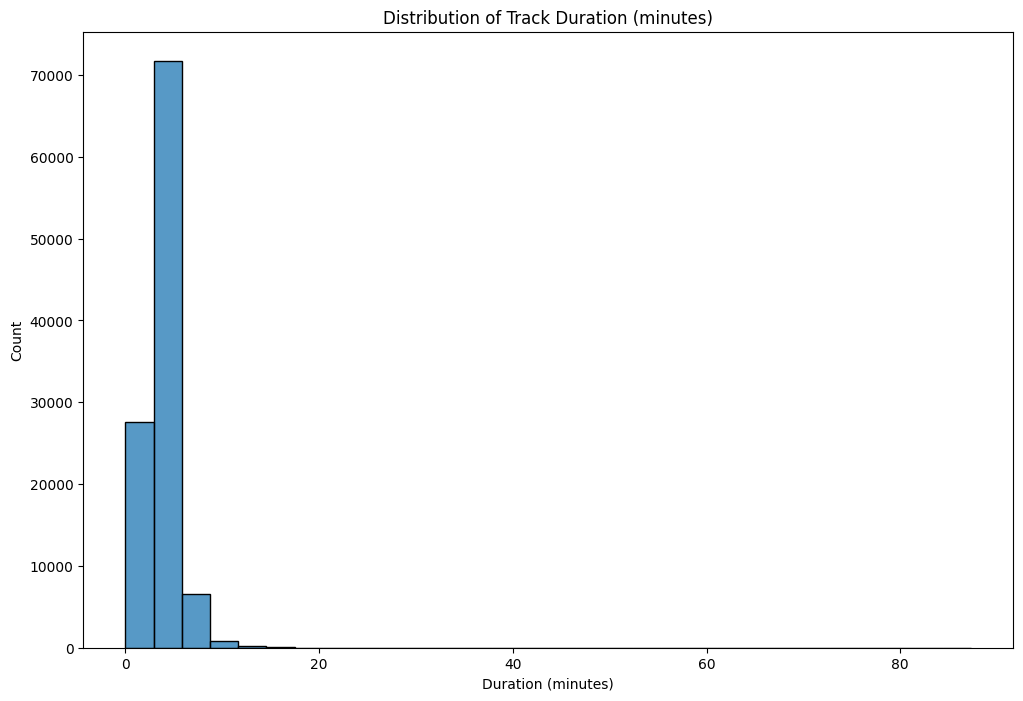

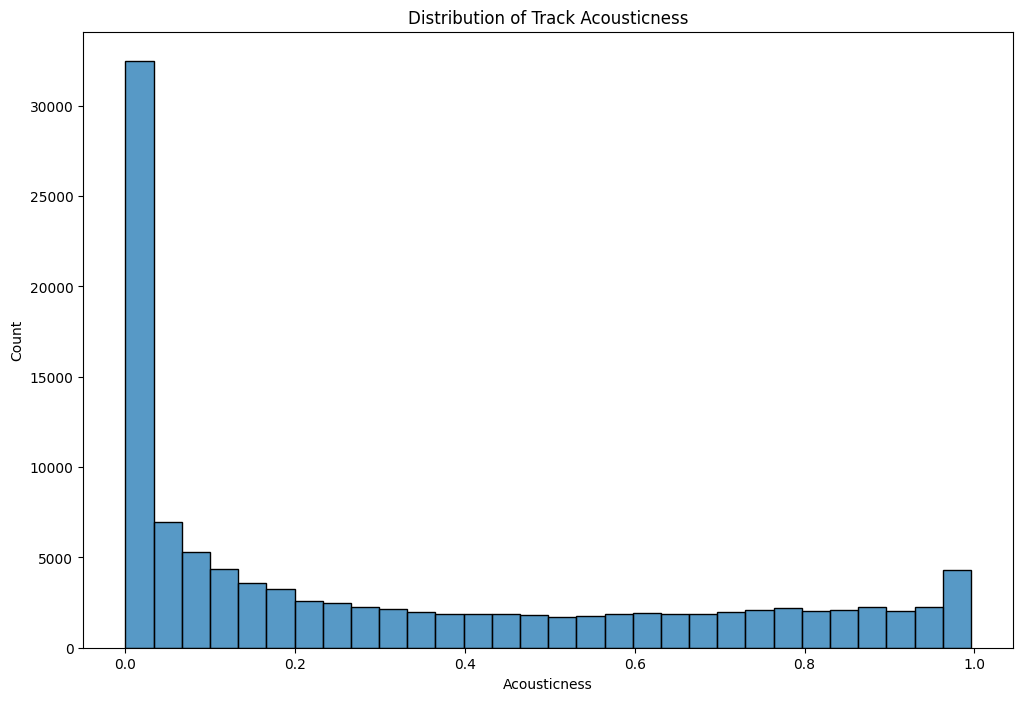

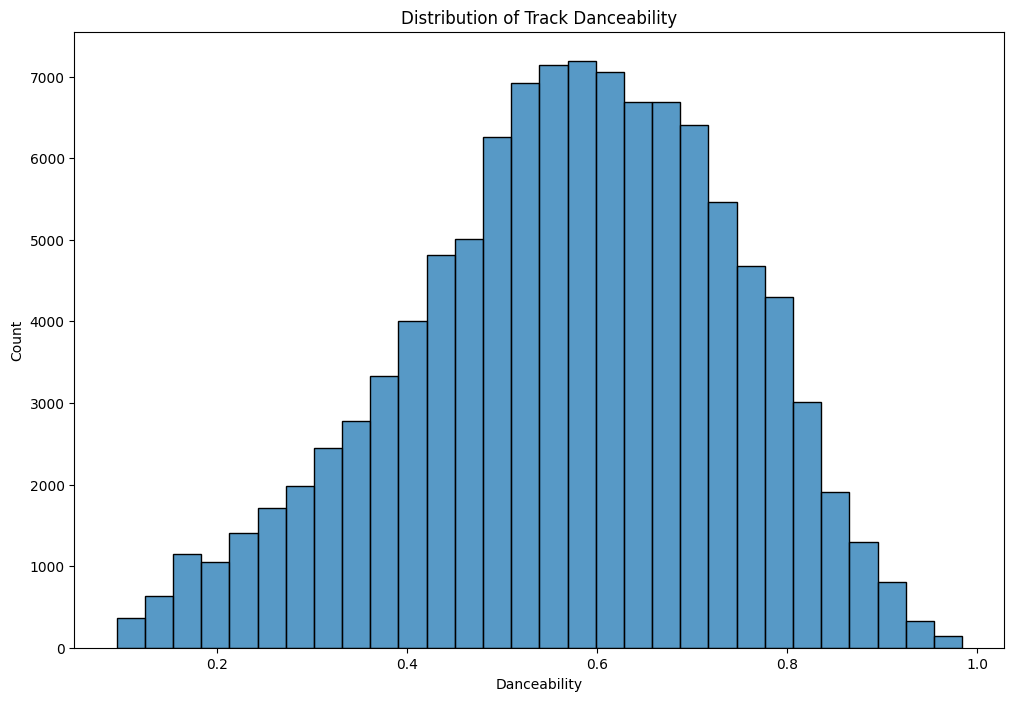

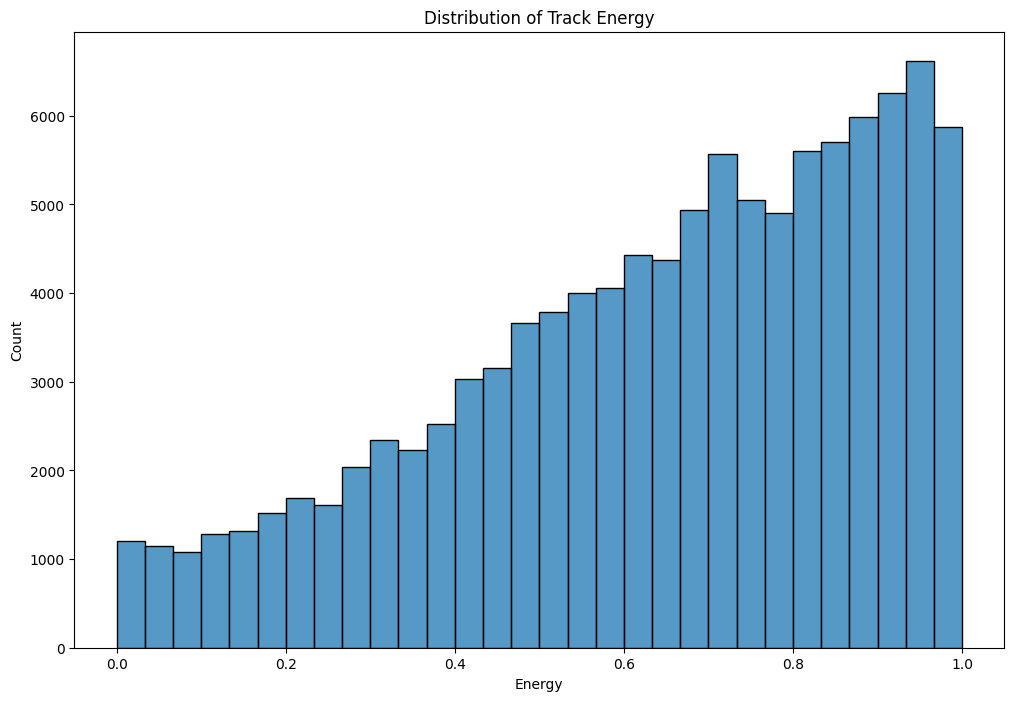

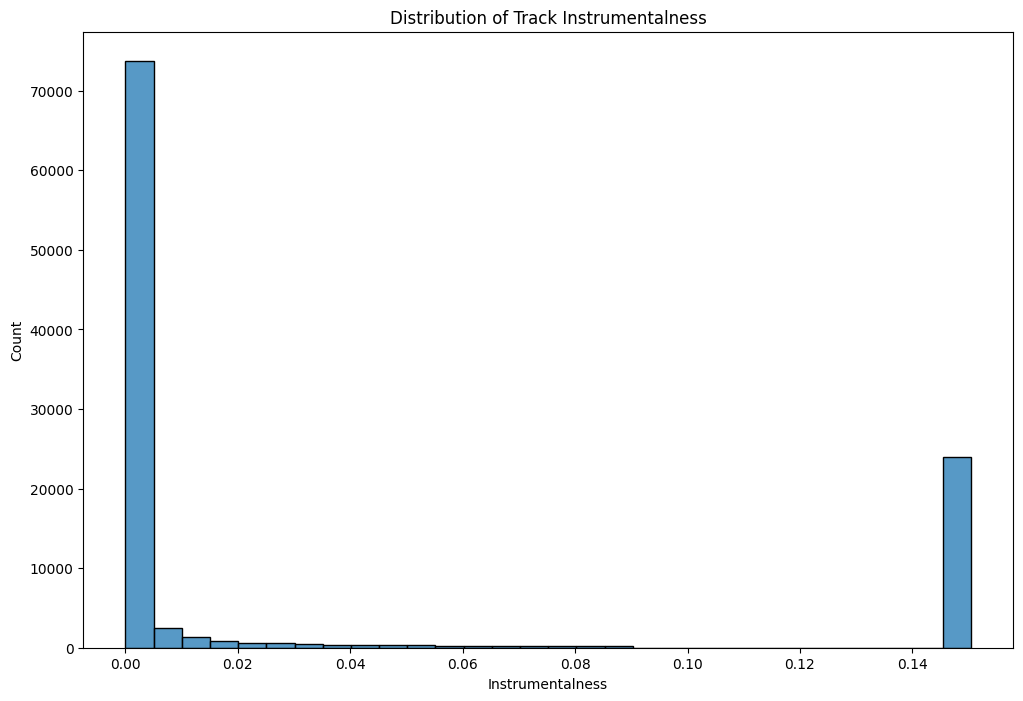

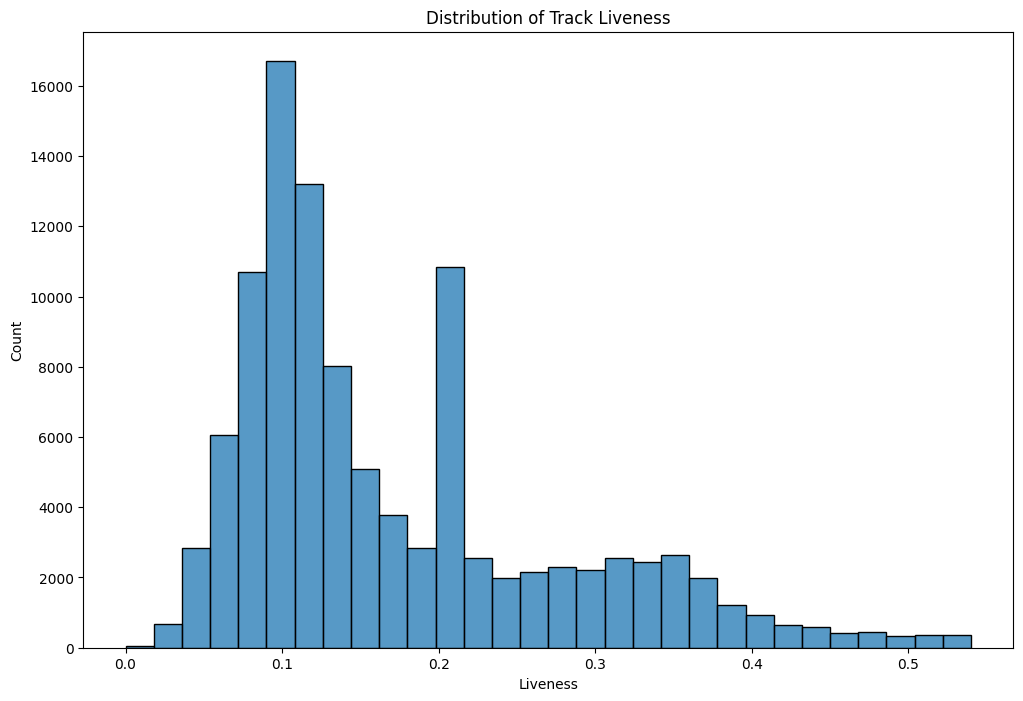

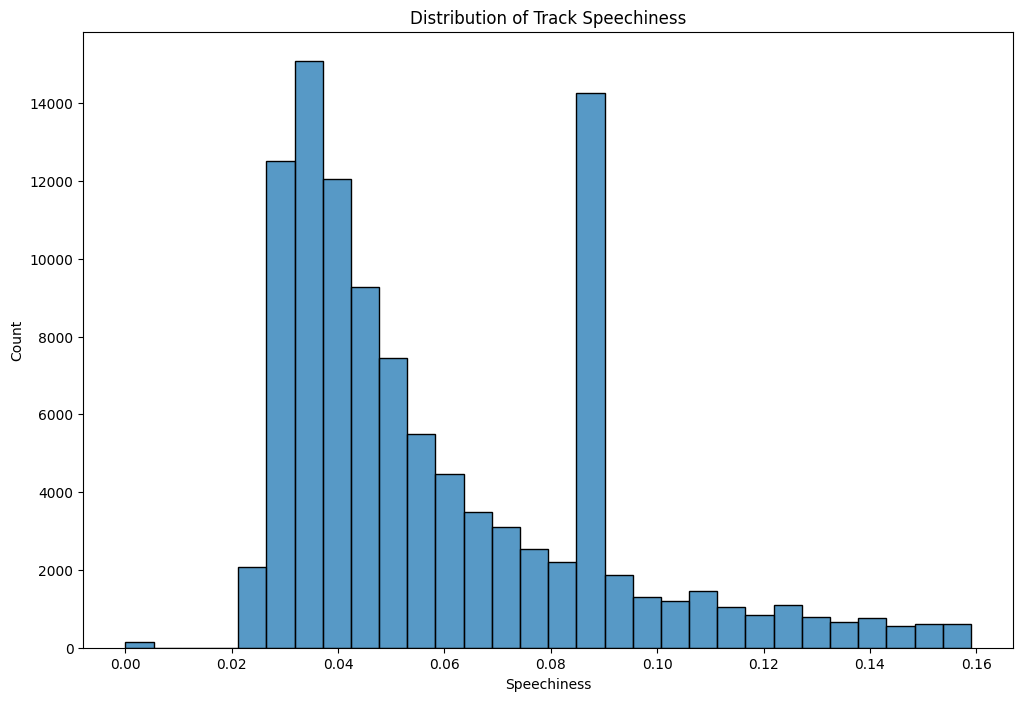

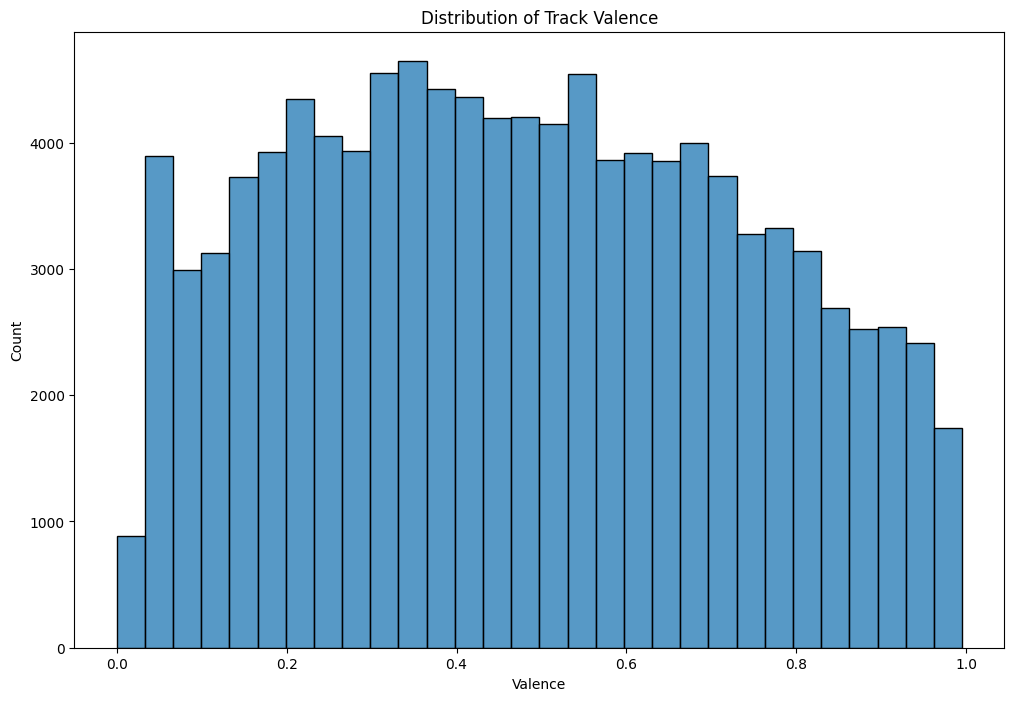

In [ ]:
# Distribution of track popularity
plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['popularity'], bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Distribution of track duration
plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['duration_ms'] / 1000 / 60, bins=30)
plt.title('Distribution of Track Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Distribution of acousticness
plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['acousticness'], bins=30)
plt.title('Distribution of Track Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.show()

# Distribution of danceability
plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['danceability'], bins=30)
plt.title('Distribution of Track Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.show()

# Distribution of energy
plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['energy'], bins=30)
plt.title('Distribution of Track Energy')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

# Distribution of "instrumentalness","liveness","speechiness","valence"
plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['instrumentalness'], bins=30)
plt.title('Distribution of Track Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['liveness'], bins=30)
plt.title('Distribution of Track Liveness')
plt.xlabel('Liveness')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['speechiness'], bins=30)
plt.title('Distribution of Track Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(tracks_df['valence'], bins=30)
plt.title('Distribution of Track Valence')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()

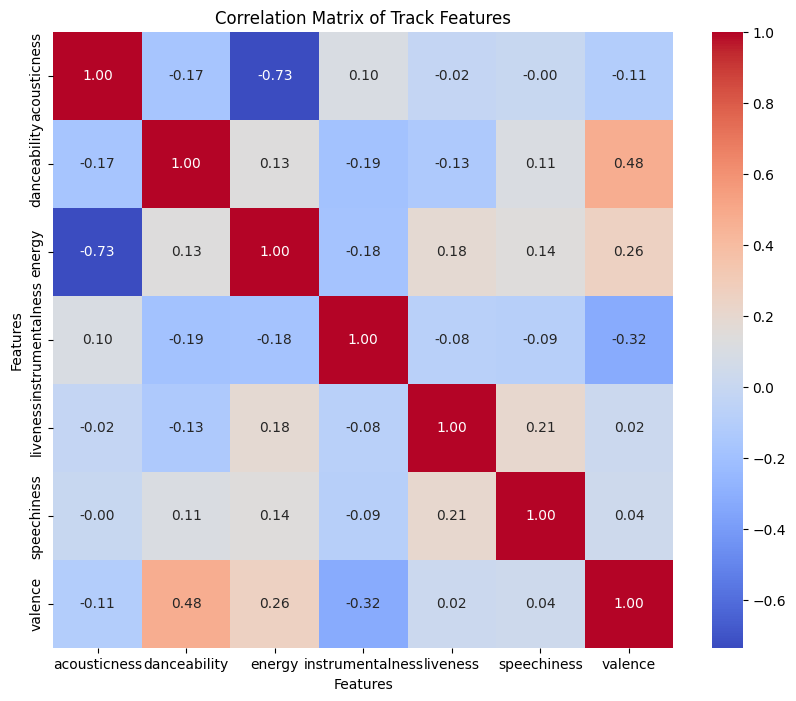

In [ ]:

# Calculate the correlation matrix
correlation_matrix = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Track Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()



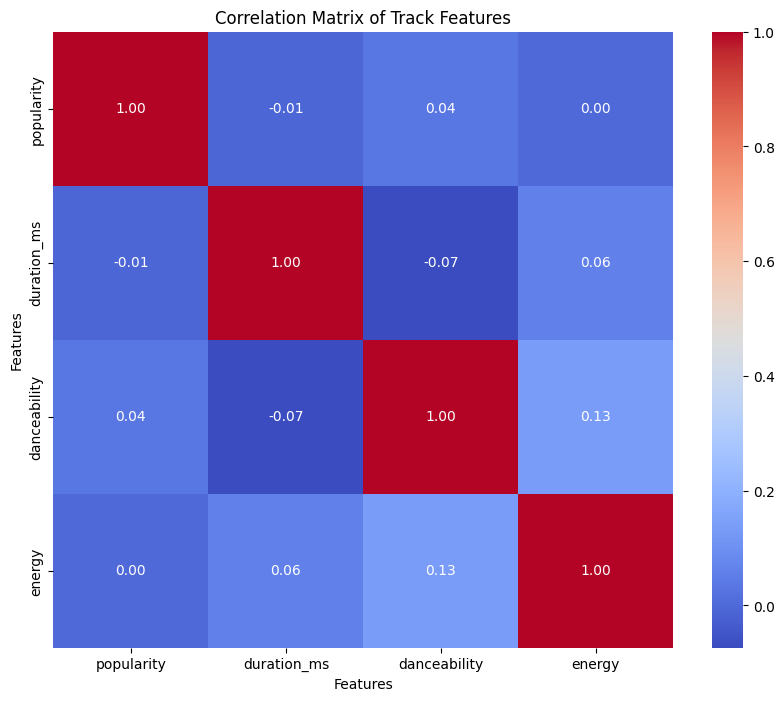

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify_tracks.csv')
df.head()
corr_matrix = df[["popularity","duration_ms","danceability","energy"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Track Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

This heatmap shows the correlation of other features of the songs. The main correlation that I wanted to look at here was how each feature affected the popularity of the song. From these results we can see that non of the features really have a big impact on the popularity of the songs. Dancabilty being the only one to have an extremely small correlation.

In [ ]:
tracks_df = pd.read_csv("spotify_tracks.csv")

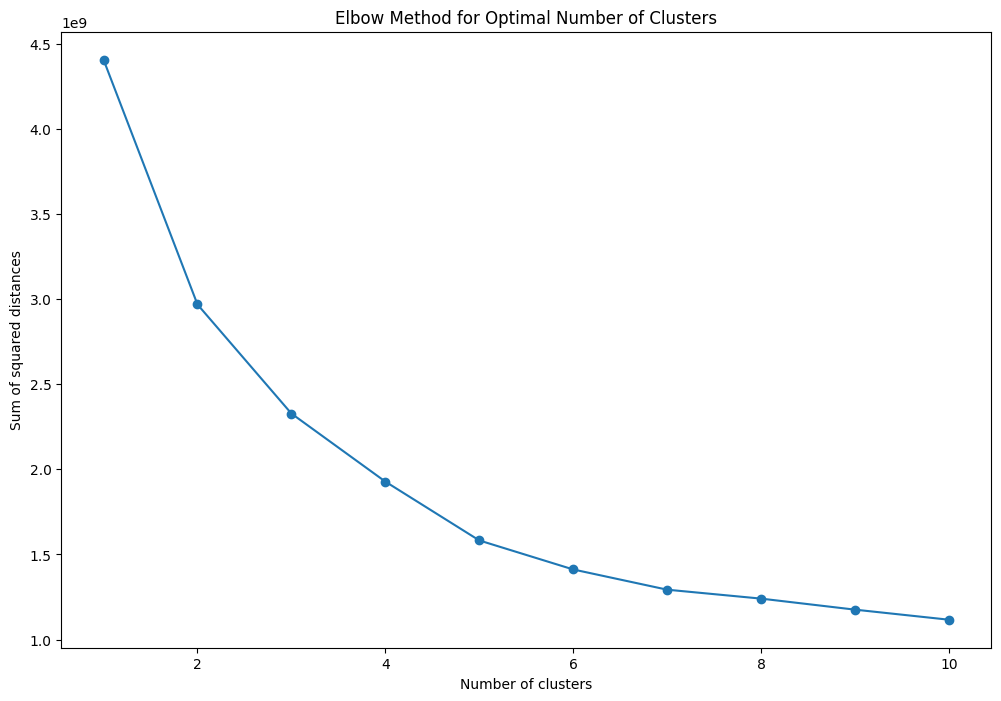

Optimal number of clusters: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


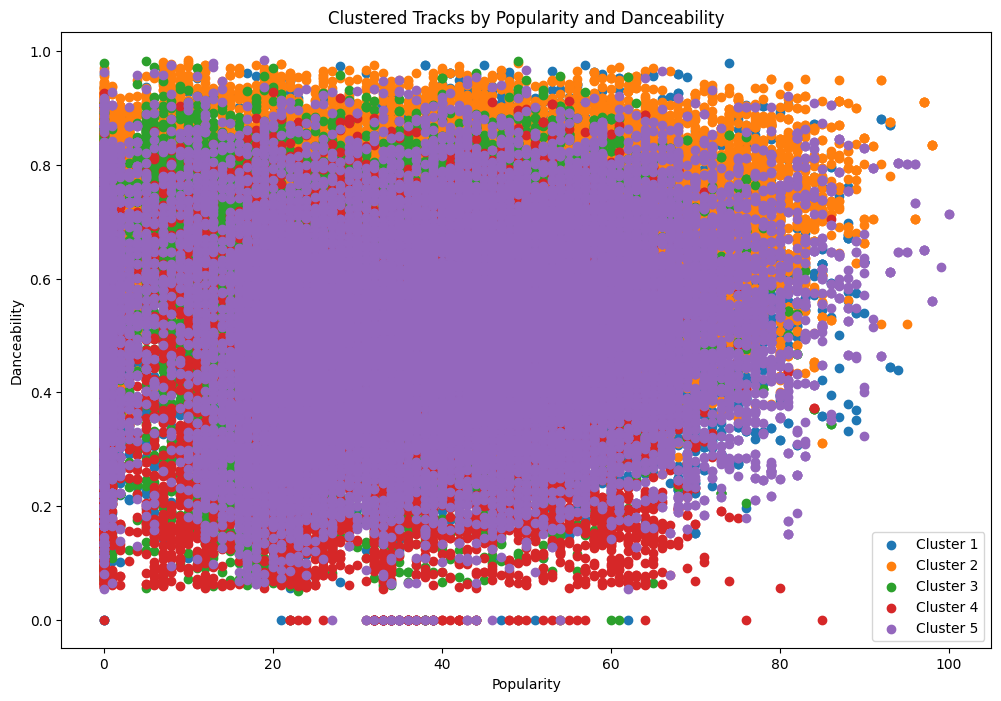

In [12]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

def replace_outliers_IQR(df, features):


  for feature in features:
    Q1 = df[feature].quantile(0.15)
    Q3 = df[feature].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ~df[feature].between(lower_bound, upper_bound, inclusive='neither')
    imputed_value = df[feature].mean()
    df.loc[outliers, feature] = imputed_value  # Replace outliers with the mean

  return df

# Remove outliers from the dataset
tracks_df_filtered = replace_outliers_IQR(tracks_df, ["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"])

# Define a function to calculate the sum of squared distances for each number of clusters
def elbow_method(df, features, max_clusters):


  distances = []
  for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(df[features])
    # Calculate the sum of squared distances for each cluster
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    distances.append(sum(np.min(cdist(df[features], cluster_centers, metric='euclidean'), axis=1))**2)

  return distances

# Calculate the sum of squared distances for each number of clusters
distances = elbow_method(tracks_df_filtered, ["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"], 10)

# Plot the Elbow Method graph to find best point
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(distances) + 1), distances, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 5  # Determined by visual inspection
print(f"Optimal number of clusters: {optimal_clusters}")

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(tracks_df_filtered[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]])

# Analyze the results
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(kmeans.n_clusters):
  cluster_data = tracks_df_filtered[cluster_labels == i]
  plt.scatter(cluster_data['popularity'], cluster_data['danceability'], label=f'Cluster {i+1}')
plt.title('Clustered Tracks by Popularity and Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.legend()
plt.show()


#do not delete; is essential
tracks_df['TYPE'] = kmeans.labels_


In [5]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 101.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=01fe22535590d21b1ea84257bbc61fac481fd469c7c6a989b1f3d86877fa2ead
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=a4d0eaf4b9664154ab1803736ab96b0368805bfbb7a640f556f7c971e7ede579
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c

In [6]:
!pip install textblob

In [13]:
import newspaper
from textblob import TextBlob
# Prompt the user for their favorite songs
favorite_songs = []
while True:
  song = input("Enter the name of one of your favorite songs (or 'done' to finish): ")
  if song == "done":
    break
  favorite_songs.append(song)

def get_recommendations(song, tracks_df):


  # Get the cluster label of the provided song
  cluster_label = tracks_df[tracks_df['track_name'] == song]['TYPE'].values[0]

  # Get the indices of songs in the same cluster
  cluster_indices = tracks_df[tracks_df['TYPE'] == cluster_label].index

  # Select a random sample of songs from the same cluster (excluding the current song)
  recommended_songs = tracks_df.iloc[np.random.choice(cluster_indices[cluster_indices != tracks_df[tracks_df['track_name'] == song].index[0]], 5)]['track_name'].tolist()

  return recommended_songs




# Get recommendations for each favorite song
recommendations = []
for song in favorite_songs:
  # Search for similar songs based on the current favorite song
  similar_songs = get_recommendations(song, tracks_df)
  # Add the recommendations to the list
  recommendations.extend(similar_songs)

def get_news_sentiment(news_url):


  # Initialize the newspaper library
  paper = newspaper.build(news_url)

  # Download and parse the articles
  paper.download_articles()
  paper.parse_articles()

  # Calculate the sentiment score for each article
  sentiment_scores = []
  for article in paper.articles:

    sentiment_score = TextBlob(article.text).sentiment.polarity
    sentiment_scores.append(sentiment_score)

  # Calculate the average sentiment score, handling the case of no articles
  if sentiment_scores:
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
  else:
    average_sentiment = 0  # or handle the case differently, e.g., raise an exception
    print("Warning: No articles found. Returning sentiment 0.")

  return average_sentiment

def adjust_recommendations(recommendations, news_sentiment):


  # If the news sentiment is negative, adjust the recommendations to include more upbeat songs
  if news_sentiment < 0:
    # Filter out songs with low energy and danceability
    recommendations = [song for song in recommendations if tracks_df[tracks_df['track_name'] == song]['energy'].values[0] > 0.5 and tracks_df[tracks_df['track_name'] == song]['danceability'].values[0] > 0.5]

  # If the news sentiment is positive, adjust the recommendations to include more mellow songs
  elif news_sentiment > 0:
    # Filter out songs with high energy and danceability
    recommendations = [song for song in recommendations if tracks_df[tracks_df['track_name'] == song]['energy'].values[0] < 0.5 and tracks_df[tracks_df['track_name'] == song]['danceability'].values[0] < 0.5]

  return recommendations

# Get the sentiment of the news articles
news_url = "https://www.bbc.com/news"
news_sentiment = get_news_sentiment(news_url)

# Adjust the recommendations based on the news sentiment
adjusted_recommendations = adjust_recommendations(recommendations, news_sentiment)

# Print the adjusted recommendations
print("Here are some adjusted recommendations based on your favorite songs and the news sentiment:")
for song in adjusted_recommendations:
  print(f"- {song}")

def collect_feedback(recommendations):


  feedback = []
  for song in adjusted_recommendations:
    rating = input(f"How much did you like {song}? (1-5): ")
    feedback.append((song, int(rating)))

  return feedback

# Collect user feedback
feedback = collect_feedback(recommendations)


# Print the feedback
print("Thank you for your feedback!")
for song, rating in feedback:
  print(f"- {song}: {rating}")

def update_recommendations(recommendations, feedback):


  updated_recommendations = []
  for song, rating in feedback:
    if rating >= 3:
      updated_recommendations.append(song)
    else:
      # Get a new recommendation to replace the low-rated song
      new_recommendation = get_recommendations(song, tracks_df)[0]
      updated_recommendations.append(new_recommendation)

  return updated_recommendations

# Update the recommendations based on feedback
updated_recommendations = update_recommendations(recommendations, feedback)

# Print the updated recommendations
print("Here are the updated recommendations based on your feedback:")
for song in updated_recommendations:
  print(f"- {song}")

Enter the name of one of your favorite songs (or 'done' to finish): Days I Will Remember
Enter the name of one of your favorite songs (or 'done' to finish): done


CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.bbc.co.uk/feed
CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.bbc.co.uk/rss
CRITICAL:newspaper.network:[REQUEST FAILED] Exceeded 30 redirects.


Here are some adjusted recommendations based on your favorite songs and the news sentiment:
- Naah
- Back and Forth
- Run Back Into Your Arms
- Intro : Persona
- Seni Dert Etmeler
How much did you like Naah? (1-5): 5
How much did you like Back and Forth? (1-5): 4
How much did you like Run Back Into Your Arms? (1-5): 3
How much did you like Intro : Persona? (1-5): 4
How much did you like Seni Dert Etmeler? (1-5): 5
Thank you for your feedback!
- Naah: 5
- Back and Forth: 4
- Run Back Into Your Arms: 3
- Intro : Persona: 4
- Seni Dert Etmeler: 5
Here are the updated recommendations based on your feedback:
- Naah
- Back and Forth
- Run Back Into Your Arms
- Intro : Persona
- Seni Dert Etmeler


# Testing new methods


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tracks_df = pd.read_csv("spotify_tracks.csv")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


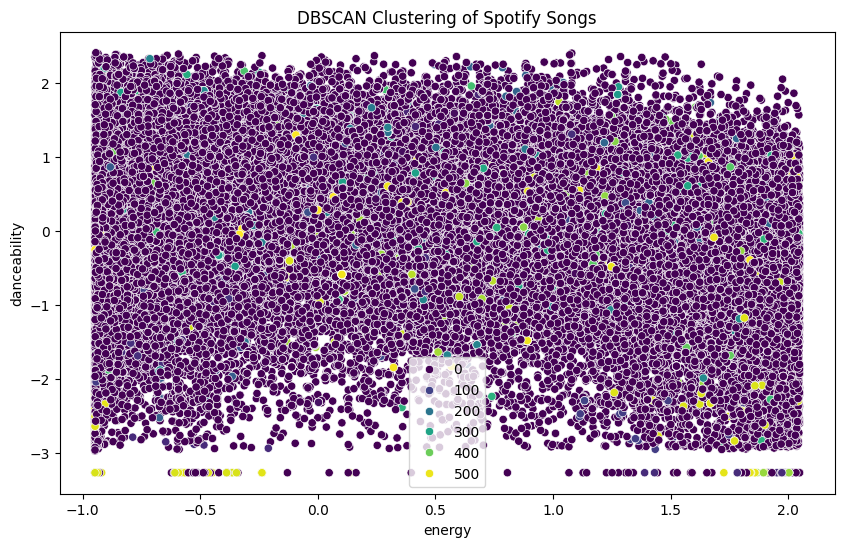

In [14]:
from sklearn.cluster import DBSCAN

#DBSCAN Algorithm
features = ["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]
x = tracks_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#Clustering Time
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
tracks_df['cluster'] = clusters

#Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis')
plt.title('DBSCAN Clustering of Spotify Songs')
plt.xlabel(features[2])
plt.ylabel(features[1])
plt.show()

In [16]:
#RUN THIS IF AND ONLY IF WE ARE COMPARING TO KMEANS, ACTUALLY DONT RUN THIS OTHER THAN IF UR NAME IS JOSh
def calculate_DBSCAN_accuracy(tracks_df):


  # Get the SCAN cluster labels
  true_labels = tracks_df['cluster']

  # Get the predicted cluster labels
  predicted_labels = tracks_df['TYPE']

  # Calculate the number of correctly clustered data points
  correct_clusters = sum(true_labels == predicted_labels)

  # Calculate the accuracy as a percentage
  accuracy = (correct_clusters / len(tracks_df)) * 100

  return accuracy

  calculate_agglomerative_accuracy(tracks_df)
  # Run the DBSCAN algorithm

print("DBSCAN Similarity:", calculate_DBSCAN_accuracy(tracks_df))

DBSCAN Similarity: 18.43245614035088


In [ ]:
#DBSCAN was never meant to be used on such a dataset; its crap dont use it because we have defined features, set clusters, fixed outliers, and a completely regular dataset. Maintenant: 18.43245614035088

# Testing Another Method

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tracks_df = pd.read_csv("spotify_tracks.csv")

In [ ]:
# run if and only if optimal clusters have been already calculated

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Define the features to be used for clustering
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tracks_df[features])

# Define the clustering model
model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")

# Fit the model to the data
model.fit(scaled_features)

# Assign cluster labels to each data point
cluster_labels = model.labels_

# Create a new column in the DataFrame to store the cluster labels
tracks_df["cluster"] = cluster_labels




In [ ]:
#RUN THIS IF AND ONLY IF WE ARE COMPARING TO KMEANS, ACTUALLY DONT RUN THIS OTHER THAN IF UR NAME IS JOSh
def calculate_agglomerative_accuracy(tracks_df):


  # Get the true cluster labels
  true_labels = tracks_df['cluster']

  # Get the predicted cluster labels
  predicted_labels = tracks_df['TYPE']

  # Calculate the number of correctly clustered data points
  correct_clusters = sum(true_labels == predicted_labels)

  # Calculate the accuracy as a percentage
  accuracy = (correct_clusters / len(tracks_df)) * 100

  return accuracy

  calculate_agglomerative_accuracy(tracks_df)
  # Run the agglomerative clustering algorithm

print("Agglomerative Clustering Accuracy:", calculate_agglomerative_accuracy(tracks_df))


KeyError: 'cluster'

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Example usage with a binary classification dataset
# Generate a random dataset for demonstration
np.random.seed(42)
num_samples = 100
tracks_df = pd.DataFrame({
    'cluster': np.random.randint(0, 2, size=num_samples),  # True labels (binary: 0 or 1)
    'TYPE': np.random.randint(0, 2, size=num_samples)      # Predicted labels (binary: 0 or 1)
})

def calculate_Agglomerative_confusion_matrix(tracks_df):

    # Get the true cluster labels
    true_labels = tracks_df['cluster']

    # Get the predicted cluster labels
    predicted_labels = tracks_df['TYPE']

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    return cm

cm = calculate_Agglomerative_confusion_matrix(tracks_df)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


NameError: name 'good_recommendations' is not defined